In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import pandas as pd

# Veri yolunu tanımlama
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

# Etiketler ve dosya yolları için listeler
labels = []
paths = []

# Tüm klasörleri ve dosyaları dolaşma
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        # Sadece .png dosyalarını seç
        if os.path.splitext(filename)[-1] == '.png':
            # 'GT' klasörünü hariç tutarak etiketi ekle
            if 'GT' not in dir_name:
                labels.append(os.path.split(dir_name)[-1])  # Klasör adı etikettir
                paths.append(os.path.join(dir_name, filename))  # Dosya yolunu ekle

# Verileri Pandas DataFrame'e dönüştürme
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = paths
data['label'] = labels

# Veri çerçevesini inceleyin
print(data.head())
print(f"Toplam Görsel Sayısı: {len(data)}")


                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
Toplam Görsel Sayısı: 9000


In [3]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verilerini %80 - %20 oranında ayırma
X_train, X_test, y_train, y_test = train_test_split(
    data['path'], data['label'], test_size=0.2, random_state=42
)

print(f"Eğitim Verisi: {len(X_train)}, Test Verisi: {len(X_test)}")


Eğitim Verisi: 7200, Test Verisi: 1800


In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

IMG_SIZE = (64, 64)  # Görsel boyutu

# Batch halinde görselleri işleyen fonksiyon
def preprocess_images_in_batches(image_paths, batch_size=100):
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i + batch_size]  # Batch'teki görsel yollarını seç
        images = []
        for path in batch_paths:
            img = load_img(path, target_size=IMG_SIZE)  # Görseli yükleme ve yeniden boyutlandırma
            img_array = img_to_array(img) / 255.0  # Normalizasyon
            images.append(img_array)  # Görseli listeye ekleme
        yield np.array(images)  # Batch'teki tüm görselleri numpy dizisi olarak döndür

# Eğitim verisini batch'lerle işleme ve modele geçirme
for X_batch in preprocess_images_in_batches(X_train, batch_size=100):
    # Her batch'te işlenen verilerle işlem yapabilirsiniz.
    # Örneğin, burada batch'leri modelinize besleyebilirsiniz.
    print(f'Processed batch of size {X_batch.shape}')

# Test verisini batch'lerle işleme
for X_batch_test in preprocess_images_in_batches(X_test, batch_size=100):
    # Her batch'te işlenen test verilerinde işlem yapabilirsiniz.
    print(f'Processed test batch of size {X_batch_test.shape}')


Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch of size (100, 64, 64, 3)
Processed batch 

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Etiketleri sayısal hale getirmek için LabelEncoder kullanımı
le = LabelEncoder()

# Eğitim etiketlerini sayısal hale getirme
y_train_encoded = le.fit_transform(y_train)  # Etiketleri sayısal kodlara dönüştürme
y_test_encoded = le.transform(y_test)  # Aynı dönüşümü test etiketlerine uygulama

# One-Hot Encoding işlemi (sayısal etiketleri vektöre dönüştürme)
y_train_onehot = pd.get_dummies(y_train_encoded).values
y_test_onehot = pd.get_dummies(y_test_encoded).values

# Her bir etiket, One-Hot Encoded olarak bir vektöre dönüştü.
print(f"One-Hot Encoded Eğitim Etiketleri: {y_train_onehot.shape}")
print(f"One-Hot Encoded Test Etiketleri: {y_test_onehot.shape}")


One-Hot Encoded Eğitim Etiketleri: (7200, 9)
One-Hot Encoded Test Etiketleri: (1800, 9)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Modelin güncellenmiş hali
model = Sequential([
    Input(shape=(64, 64, 3)),  # İlk giriş katmanını tanımlıyoruz
    Conv2D(32, (3, 3), activation='relu'),  # Artık input_shape'e gerek yok
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(y_train_onehot[0]), activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model özetini görüntüleme
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,313 (6.20 MB)

 Trainable params: 1,626,313 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 112s 494ms/step - accuracy: 0.3540 - loss: 1.7835 - val_accuracy: 0.7176 - val_loss: 0.8634
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 109s 484ms/step - accuracy: 0.7139 - loss: 0.8273 - val_accuracy: 0.8484 - val_loss: 0.4527
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 106s 474ms/step - accuracy: 0.8193 - loss: 0.5319 - val_accuracy: 0.9152 - val_loss: 0.2744
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 105s 467ms/step - accuracy: 0.8843 - loss: 0.3410 - val_accuracy: 0.9604 - val_loss: 0.1566
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 86s 384ms/step - accuracy: 0.9430 - loss: 0.1652 - val_accuracy: 0.9757 - val_loss: 0.0725
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 92s 412ms/step - accuracy: 0.9439 - loss: 0.1546 - val_accuracy: 0.9802 - val_loss: 0.0670
Epoch 9/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 93s 416ms/step - accuracy: 0.9618 - loss: 0.1072 - val_accuracy: 0.9830 - val_loss: 0.0504
Epoch 10/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 93s 414ms/step - accuracy: 0.9640 - lo

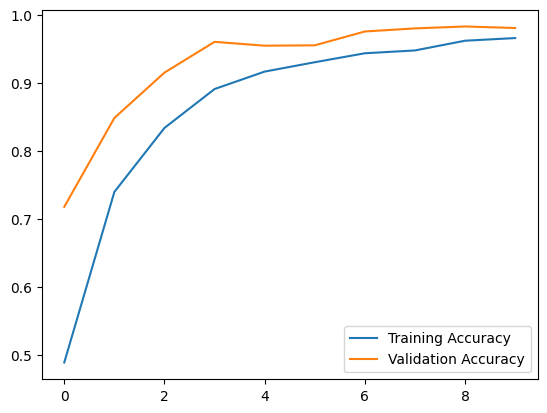

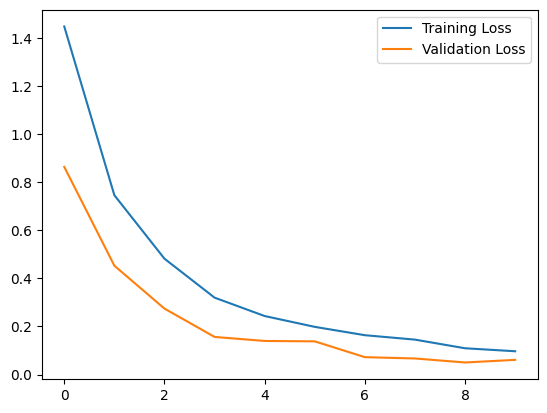

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Modeli oluşturma
model = Sequential([
    Input(shape=(64, 64, 3)),  # Giriş boyutunu tanımlıyoruz
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(y_train_onehot[0]), activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Batch generator fonksiyonu
def batch_generator(image_paths, labels, batch_size=32):
    """Her batch'te görselleri yükleyip modele aktarır."""
    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]

            images = [
                img_to_array(load_img(path, target_size=(64, 64))) / 255.0 
                for path in batch_paths
            ]
            yield np.array(images), np.array(batch_labels)

# Erken durdurma (Overfitting’i önlemek için)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Modeli eğitme
history = model.fit(
    batch_generator(X_train, y_train_onehot),  # Eğitim için batch generator
    validation_data=batch_generator(X_test, y_test_onehot),  # Test verisi için
    epochs=10,
    steps_per_epoch=len(X_train) // 32,  # Her epoch'taki adım sayısı
    validation_steps=len(X_test) // 32,  # Validasyon için adım sayısı
    callbacks=[early_stop]
)

# Eğitim ve doğrulama sonuçlarını görselleştirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


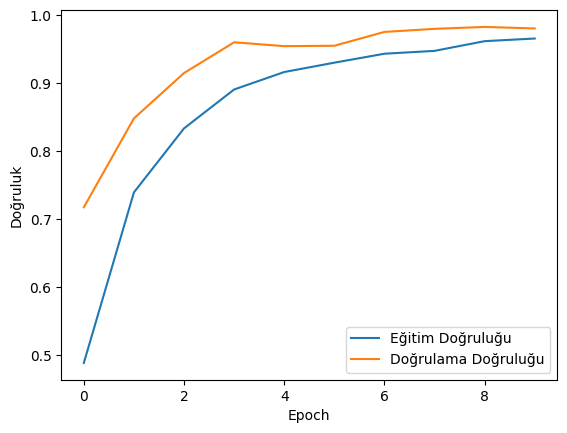

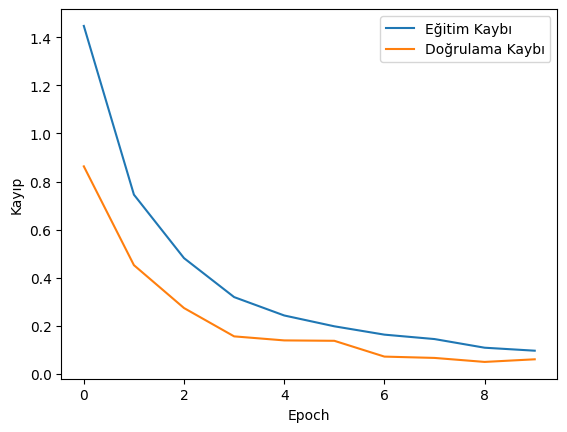

In [15]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [17]:
# Test verisini tek bir numpy dizisine dönüştürme
def preprocess_images(image_paths):
    """Tüm test görsellerini yükleyip numpy dizisi olarak döndürür."""
    images = [
        img_to_array(load_img(path, target_size=(64, 64))) / 255.0
        for path in image_paths
    ]
    return np.array(images)

# Test verisini önişleme
X_test_processed = preprocess_images(X_test)

# Tahminleri yapma
y_pred = model.predict(X_test_processed).argmax(axis=1)  # En yüksek olasılığa sahip sınıfı al

# Confusion Matrix ve Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Confusion Matrix:
[[207   0   1   1   0   0   0   2   0]
 [  0 198   1   0   3   0   0   0   2]
 [  0   0 192   0   0   0   0   2   1]
 [  0   0   0 190   0   0   0   1   0]
 [  0   0   0   0 198   0   0   0   3]
 [  0   4   1   0   0 174   0   0   0]
 [  0   0   0   2   1   0 206   0   0]
 [  2   1   0   0   0   1   0 203   0]
 [  0   1   0   0   0   0   0   0 202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       211
           1       0.97      0.97      0.97       204
           2       0.98      0.98      0.98       195
           3       0.98      0.99      0.99       191
           4       0.98      0.99      0.98       201
           5       0.99      0.97      0.98       179
           6       1.00      0.99      0.99       209
           7       0.98      0.98      0.98       207
           8       0.97      1.00      0.98       203

    accuracy            

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Daha derin bir model oluşturma
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # Daha derin bir katman ekledik
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),  # Daha fazla nöron
    Dropout(0.5),
    Dense(len(y_train_onehot[0]), activation='softmax')  # Çıkış katmanı
])

# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model özetini görüntüleme
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,465 (4.87 MB)

 Trainable params: 1,275,465 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 27s 112ms/step - accuracy: 0.3365 - loss: 1.7570 - val_accuracy: 0.7900 - val_loss: 0.6755
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.7628 - loss: 0.6839 - val_accuracy: 0.8600 - val_loss: 0.4179
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.8653 - loss: 0.3868 - val_accuracy: 0.9367 - val_loss: 0.1722
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9152 - loss: 0.2366 - val_accuracy: 0.9594 - val_loss: 0.1143
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.9401 - loss: 0.1794 - val_accuracy: 0.9500 - val_loss: 0.1275
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9477 - loss: 0.1460 - val_accuracy: 0.9706 - val_loss: 0.0959
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.9526 - loss: 0.1424 - val_accuracy: 0.9811 - val_loss: 0.0581
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.9715 - loss: 0

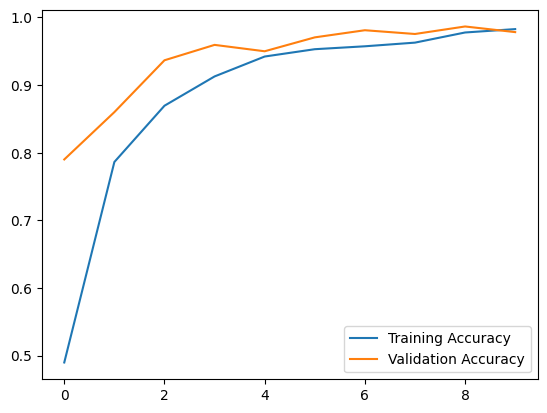

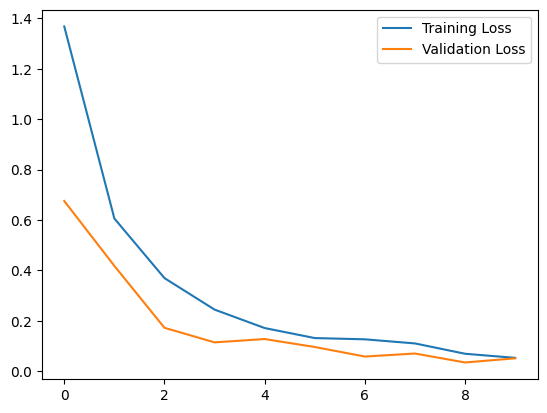

In [20]:
# Eğitim ve test verisini numpy dizisine dönüştürme
def preprocess_images(image_paths):
    """Görselleri yükleyip 64x64 boyutunda normalize edilmiş numpy dizisi olarak döndürür."""
    images = [
        img_to_array(load_img(path, target_size=(64, 64))) / 255.0
        for path in image_paths
    ]
    return np.array(images)

# Eğitim ve test verisini önişleme
X_train_processed = preprocess_images(X_train)
X_test_processed = preprocess_images(X_test)

# Modeli yeniden eğitme
history = model.fit(
    X_train_processed, y_train_onehot, 
    epochs=10, 
    validation_data=(X_test_processed, y_test_onehot)
)

# Eğitim ve doğrulama sonuçlarını görselleştirme
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


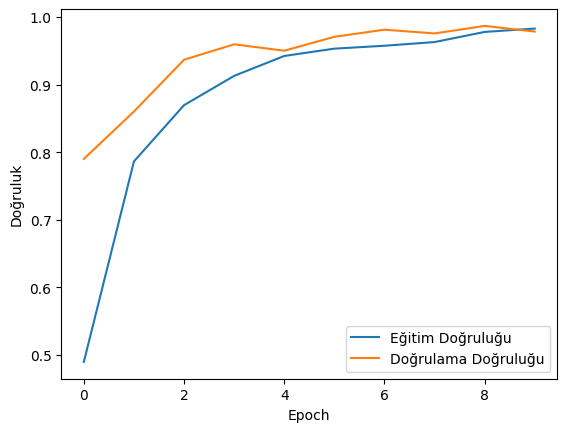

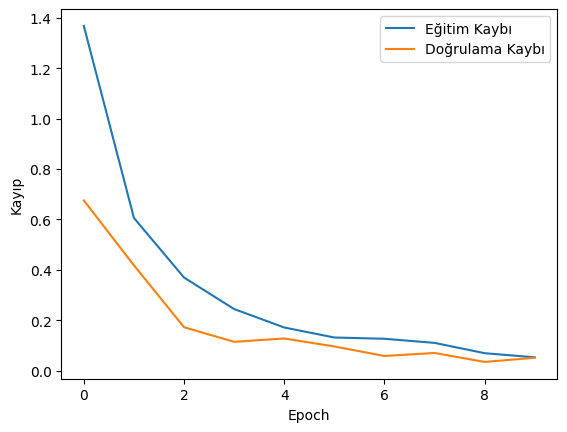

In [21]:
# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Nihai modelin tahminlerini yapma
y_pred = model.predict(X_test_processed).argmax(axis=1)

# Confusion Matrix ve Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred))


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Confusion Matrix:
[[209   0   1   0   0   0   0   1   0]
 [  0 192   2   0  10   0   0   0   0]
 [  0   0 195   0   0   0   0   0   0]
 [  0   0   0 190   0   0   0   1   0]
 [  0   0   1   0 200   0   0   0   0]
 [  5   0   2   0   0 170   0   2   0]
 [  0   0   0   1   0   0 208   0   0]
 [  0   0   0   2   0   0   9 196   0]
 [  0   0   0   0   2   0   0   0 201]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       211
           1       1.00      0.94      0.97       204
           2       0.97      1.00      0.98       195
           3       0.98      0.99      0.99       191
           4       0.94      1.00      0.97       201
           5       1.00      0.95      0.97       179
           6       0.96      1.00      0.98       209
           7       0.98      0.95      0.96       207
           8       1.00      0.99      1.00       203

    accuracy            

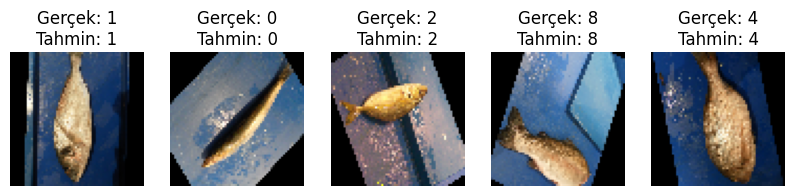

In [23]:
import matplotlib.pyplot as plt

# Test verilerinden birkaç örnek görseli ve model tahminlerini görselleştir
def display_predictions(images, labels, predictions, index, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[index + i])
        plt.title(f"Gerçek: {labels[index + i]}\nTahmin: {predictions[index + i]}")
        plt.axis('off')
    plt.show()

# Tahmin edilen ve gerçek etiketlerle birkaç görsel gösterme
display_predictions(X_test_processed, y_test_encoded, y_pred, index=0, num_images=5)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━

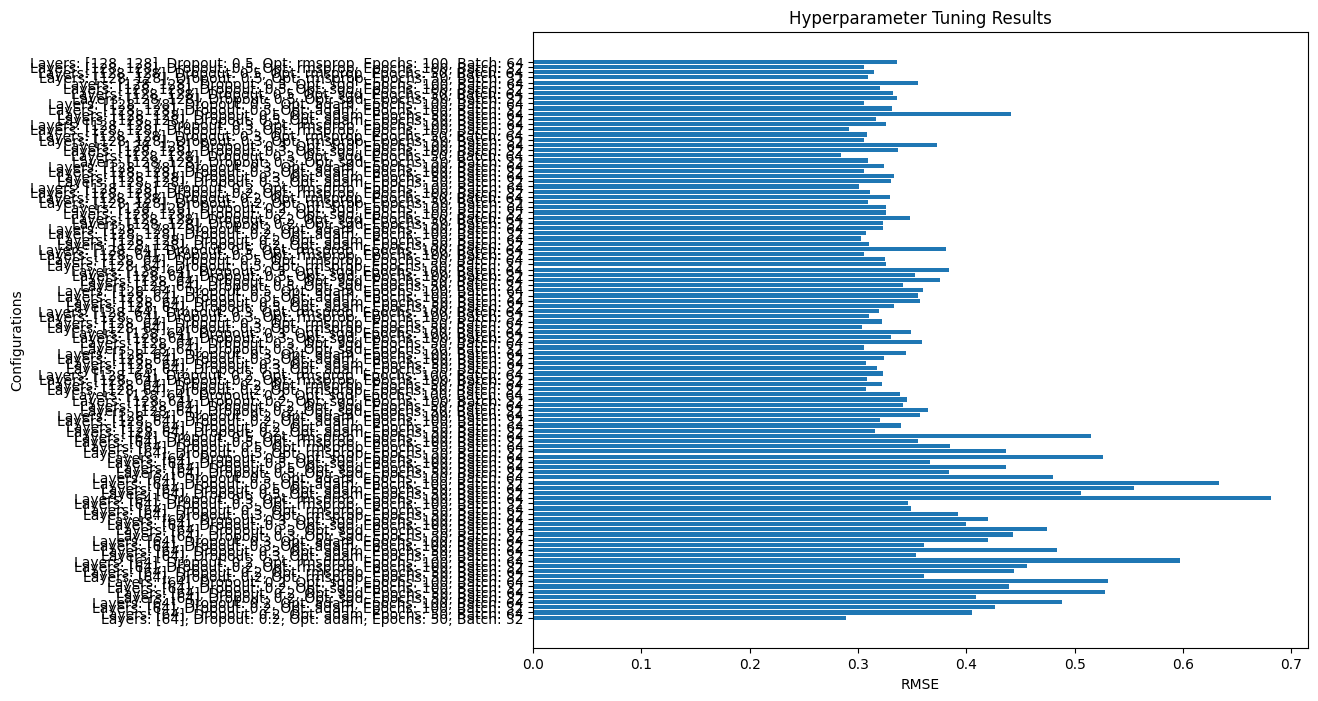

Best RMSE: 0.2842791680826011


In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dummy dataset oluşturma (kendi verinizi buraya ekleyin)
X = np.random.rand(1000, 10)  # 1000 örnek, 10 özellik
y = np.random.rand(1000, 1)   # 1000 hedef değeri

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalleştirme (ölçeklendirme)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeli oluşturmak için fonksiyon
def create_model(layers=[64], dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    
    # Giriş katmanını Input ile başlatıyoruz
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(layers[0], activation='relu'))
    model.add(Dropout(dropout_rate))

    # Orta katmanlar
    for layer in layers[1:]:
        model.add(Dense(layer, activation='relu'))
        model.add(Dropout(dropout_rate))

    # Çıkış katmanı (Regresyon için)
    model.add(Dense(1))

    # Optimizatör seçimi
    optimizers = {'adam': Adam(), 'sgd': SGD(), 'rmsprop': RMSprop()}
    model.compile(loss='mean_squared_error', optimizer=optimizers[optimizer])
    return model

# Hiperparametre optimizasyonu için listeler
layers_list = [[64], [128, 64], [128, 128]]
dropout_rates = [0.2, 0.3, 0.5]
optimizers = ['adam', 'sgd', 'rmsprop']
epochs_list = [50, 100]
batch_sizes = [32, 64]

# En iyi modeli bulmak için değişkenler
best_model = None
best_rmse = float('inf')
results = []

# EarlyStopping callback tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Hiperparametre optimizasyon döngüsü
for layers in layers_list:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            for epochs in epochs_list:
                for batch_size in batch_sizes:
                    # Modeli oluştur
                    model = create_model(layers=layers, dropout_rate=dropout_rate, optimizer=optimizer)
                    
                    # Modeli eğit
                    history = model.fit(
                        X_train, y_train, 
                        validation_data=(X_test, y_test), 
                        epochs=epochs, batch_size=batch_size, verbose=0,
                        callbacks=[early_stopping]
                    )
                    
                    # Tahmin yap ve RMSE'yi hesapla
                    y_pred = model.predict(X_test)
                    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                    results.append((layers, dropout_rate, optimizer, epochs, batch_size, rmse))
                    
                    # En iyi modeli güncelle
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_model = model

# En iyi modeli kaydet
best_model.save('best_model.h5')

# Sonuçları görselleştirme
labels = [
    f"Layers: {layers}, Dropout: {dropout}, Opt: {opt}, Epochs: {ep}, Batch: {bs}" 
    for layers, dropout, opt, ep, bs, _ in results
]
rmse_scores = [rmse for _, _, _, _, _, rmse in results]

plt.figure(figsize=(10, 8))
plt.barh(labels, rmse_scores)
plt.xlabel('RMSE')
plt.ylabel('Configurations')
plt.title('Hyperparameter Tuning Results')
plt.show()

# En iyi sonucu yazdır
print("Best RMSE:", best_rmse)


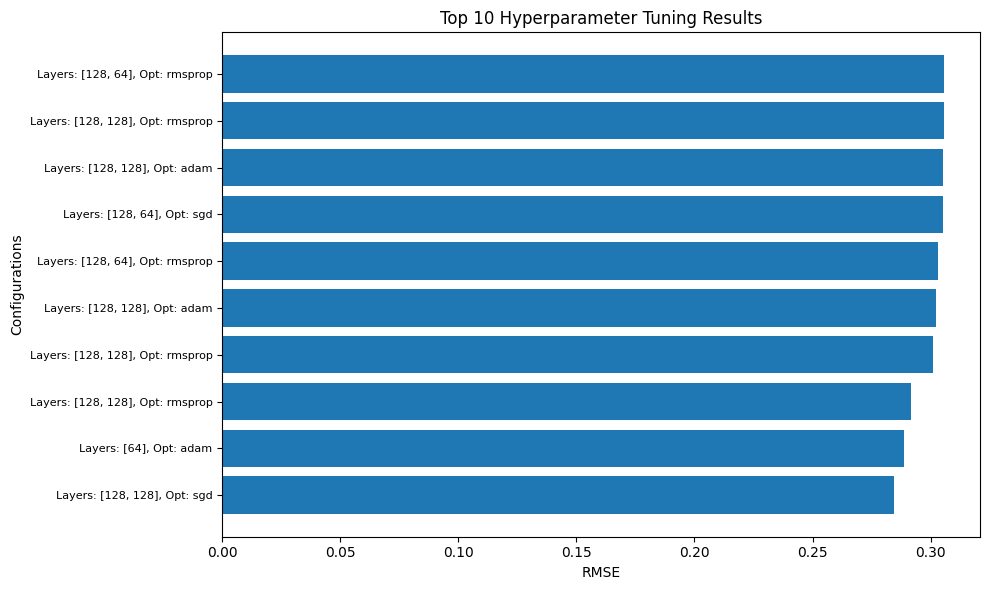

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Sonuçları sıralama (küçükten büyüğe)
sorted_results = sorted(results, key=lambda x: x[5])

# İlk 10 sonucu alma
top_results = sorted_results[:10]
top_labels = [f"Layers: {layers}, Opt: {opt}" for layers, _, opt, _, _, _ in top_results]
top_rmse_scores = [rmse for _, _, _, _, _, rmse in top_results]

# Daha okunaklı grafik oluşturma
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(top_labels)), top_rmse_scores, tick_label=top_labels)
plt.xlabel('RMSE')
plt.ylabel('Configurations')
plt.title('Top 10 Hyperparameter Tuning Results')

# Y ekseninde etiket karmaşasını önlemek için yazı boyutunu küçültme
plt.yticks(fontsize=8, rotation=0)
plt.tight_layout()

# Grafiği göster
plt.show()
